In [38]:
obs = pd.read_csv("obs_matrix_newer_dataset.csv")
obs = obs.drop(['map_Cursed Hollow', 'allied_char_Gall', 'opposing_char_Gall', 'opposing_char_Zeratul', 'allied_char_Zeratul'], axis=1)


In [39]:
obs.head()


,allied_avg_hero_level,allied_avg_mrr,allied_char_Abathur,allied_char_Alarak,allied_char_Alexstrasza,allied_char_Ana,allied_char_Anubarak,allied_char_Artanis,allied_char_Arthas,allied_char_Auriel,...,opposing_char_Uther,opposing_char_Valeera,opposing_char_Valla,opposing_char_Varian,opposing_char_Xul,opposing_char_Yrel,opposing_char_Zagara,opposing_char_Zarya,opposing_char_Zuljin,outcome
0,13.0,1726.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,14.6,1616.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,14.4,2317.2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
3,16.6,2068.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,13.4,2303.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [40]:
obs.shape

(238194, 165)

In [41]:
from statsmodels.discrete.discrete_model import Logit
from statsmodels.tools import add_constant

In [43]:
def demean(s):
    return s - s.mean()


obs['allied_avg_mrr']        = demean(obs['allied_avg_mrr'])
obs['allied_avg_hero_level'] = demean(obs['allied_avg_hero_level'])
obs['opp_avg_hero_level']    = demean(obs['opp_avg_hero_level'])
obs['opp_avg_mrr']           = demean(obs['opp_avg_mrr'])


obs['allied_avg_mrr**2']          = obs['allied_avg_mrr']**2
obs['allied_avg_hero_level**2']   = obs['allied_avg_hero_level']**2
obs['opp_avg_hero_level**2']      = obs['opp_avg_hero_level']**2
obs['opp_avg_mrr**2']             = obs['opp_avg_mrr']**2
      

lg = Logit(obs['outcome'], add_constant(obs.drop('outcome', axis=1)))

In [44]:
results = lg.fit()

Optimization terminated successfully.
         Current function value: 0.668012
         Iterations 4


In [45]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                outcome   No. Observations:               238194
Model:                          Logit   Df Residuals:                   238025
Method:                           MLE   Df Model:                          168
Date:                Tue, 11 Sep 2018   Pseudo R-squ.:                 0.03626
Time:                        16:56:05   Log-Likelihood:            -1.5912e+05
converged:                       True   LL-Null:                   -1.6510e+05
                                        LLR p-value:                     0.000
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                          -5.004e-13      0.169  -2.97e-12      1.000      -0.331       0.331
allied_avg_hero_level              0.0526      0.002     30.211      0.000       0.049       0.056
allied_avg_mrr                     0.0013   2.77e-05     48.231      0.000       0.001       0.001
allied_char_Abathur               -0.1298      0.033     -3.958      0.000      -0.194      -0.066
allied_char_Alarak                -0.0221      0.029     -0.752      0.452      -0.080       0.036
allied_char_Alexstrasza           -0.0179      0.037     -0.477      0.633      -0.091       0.055
allied_char_Ana                    0.1026      0.038      2.701      0.007       0.028       0.177
allied_char_Anubarak               0.0114      0.030      0.382      0.703      -0.047       0.070
allied_char_Artanis                0.0908      0.028      3.290      0.001       0.037       0.145
allied_char_Arthas                -0.0320      0.030     -1.076      0.282      -0.090       0.026
allied_char_Auriel                -0.0145      0.038     -0.379      0.705      -0.089       0.060
allied_char_Azmodan               -0.0072      0.027     -0.269      0.788      -0.059       0.045
allied_char_Blaze                 -0.0923      0.030     -3.086      0.002      -0.151      -0.034
allied_char_Brightwing             0.0156      0.037      0.420      0.675      -0.057       0.089
allied_char_Cassia                 0.2426      0.028      8.572      0.000       0.187       0.298
allied_char_Chen                  -0.1356      0.048     -2.848      0.004      -0.229      -0.042
allied_char_Cho                    0.2554      0.064      3.972      0.000       0.129       0.381
allied_char_Chromie               -0.1465      0.029     -4.997      0.000      -0.204      -0.089
allied_char_D.Va                  -0.0254      0.037     -0.678      0.498      -0.099       0.048
allied_char_Deckard                0.0341      0.037      0.933      0.351      -0.038       0.106
allied_char_Dehaka                 0.0745      0.028      2.690      0.007       0.020       0.129
allied_char_Diablo                -0.1135      0.027     -4.207      0.000      -0.166      -0.061
allied_char_E.T.C.                -0.0825      0.029     -2.856      0.004      -0.139      -0.026
allied_char_Falstad               -0.0256      0.028     -0.913      0.361      -0.081       0.029
allied_char_Fenix                  0.2055      0.027      7.636      0.000       0.153       0.258
allied_char_Garrosh               -0.1943      0.029     -6.635      0.000      -0.252      -0.137
allied_char_Gazlowe                0.0634      0.037      1.709      0.087      -0.009       0.136
allied_char_Genji                 -0.0493      0.027     -1.825      0.068      -0.102       0.004
allied_char_Greymane              -0.0589      0.029     -2.057      0.040      -0.115      -0.003
allied_char_Guldan                -0.0910      0.027     -3.363      0.00

In [46]:
x = results.params.filter(like='allied_char')

In [57]:
y = pd.Series({c:obs.loc[obs[c].astype(bool)]['outcome'].mean() for c in x.index})
y_std = pd.Series({c:obs.loc[obs[c].astype(bool)]['outcome'].std()/np.sqrt(obs[c].astype(bool).sum()) for c in x.index})


In [58]:
y_std

allied_char_Abathur             0.005426
allied_char_Alarak              0.004501
allied_char_Alexstrasza         0.003930
allied_char_Ana                 0.004317
allied_char_Anubarak            0.004249
allied_char_Artanis             0.003510
allied_char_Arthas              0.004095
allied_char_Auriel              0.004372
allied_char_Azmodan             0.003114
allied_char_Blaze               0.004390
allied_char_Brightwing          0.003926
allied_char_Cassia              0.003930
allied_char_Chen                0.010016
allied_char_Cho                 0.010510
allied_char_Chromie             0.004225
allied_char_D.Va                0.007085
allied_char_Deckard             0.003400
allied_char_Dehaka              0.003521
allied_char_Diablo              0.002510
allied_char_E.T.C.              0.003601
allied_char_Falstad             0.003780
allied_char_Fenix               0.003235
allied_char_Garrosh             0.003781
allied_char_Gazlowe             0.007034
allied_char_Genj

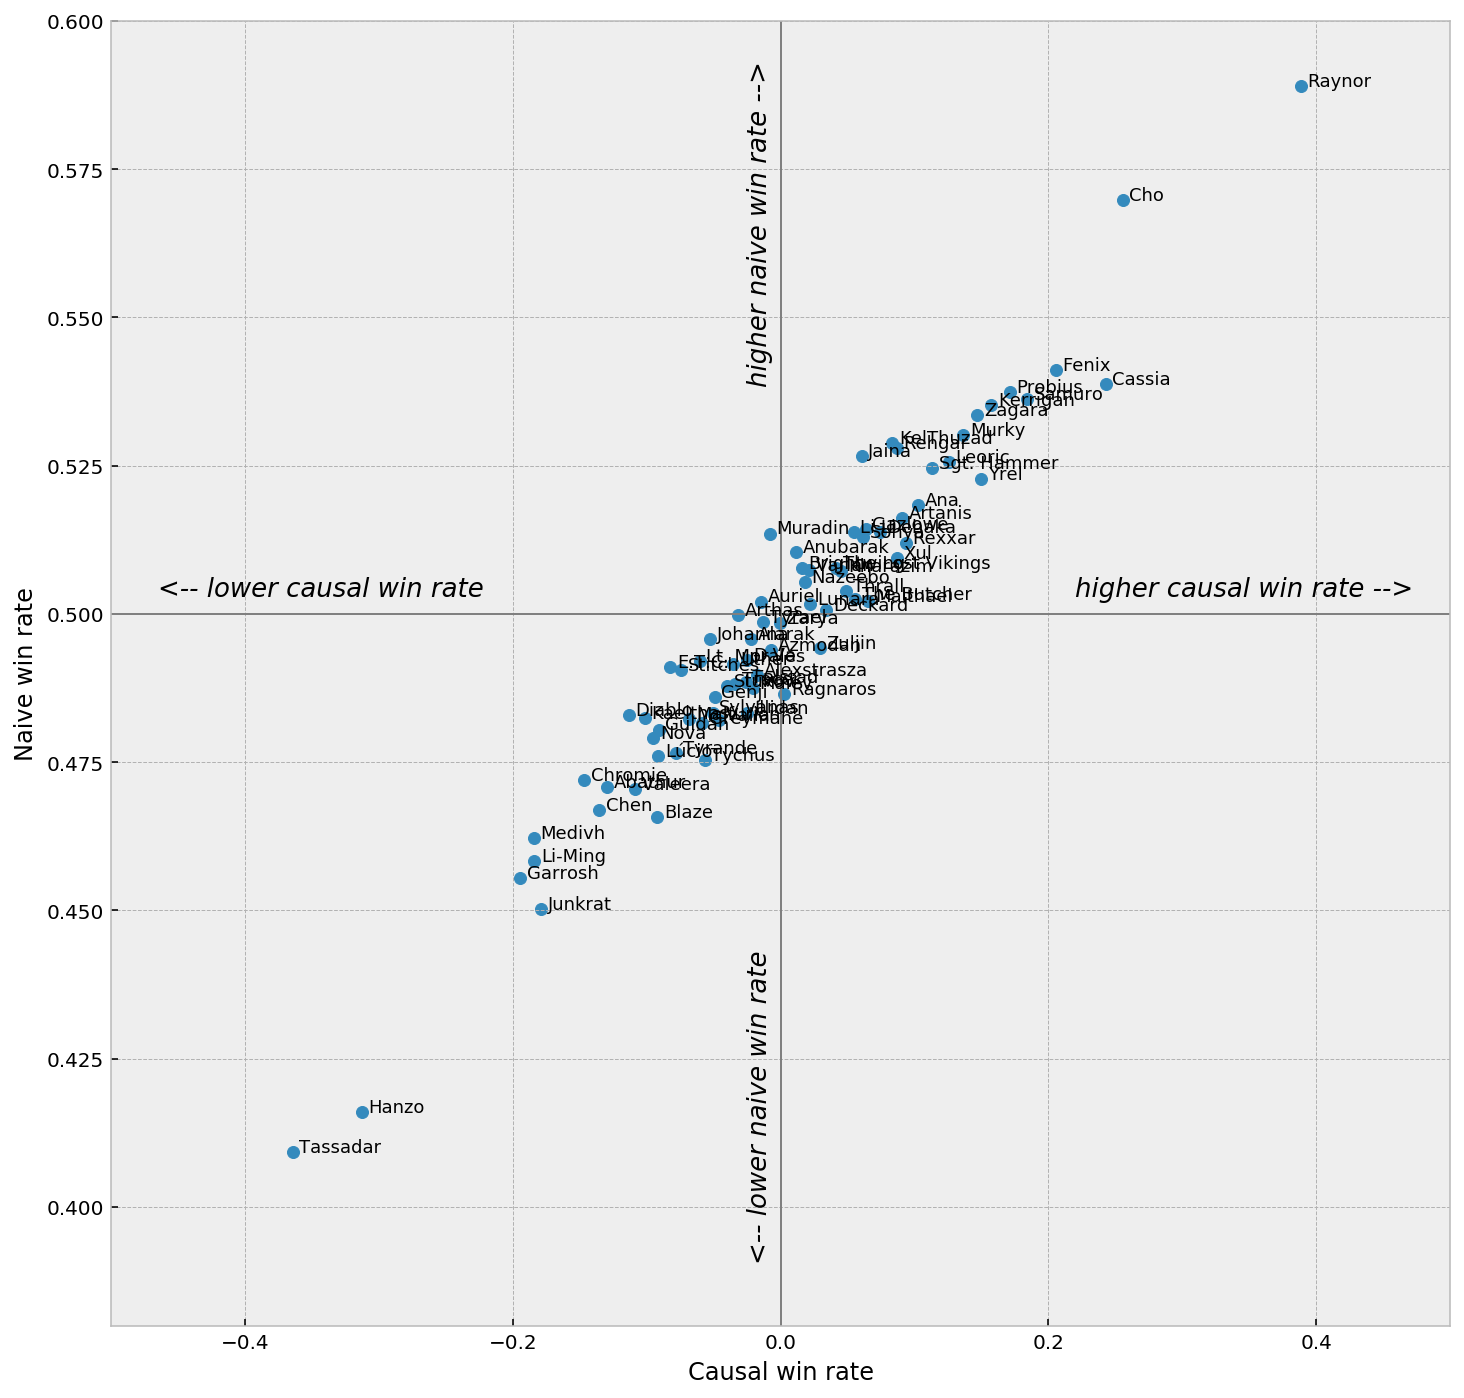

In [48]:
%matplotlib inline
from matplotlib import pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use('bmh')

f, ax = plt.subplots(1,1,figsize=(12,12))
ax.scatter(x, y)

for i, txt in enumerate(x.index):
    txt = txt.lstrip("allied_char_")
    ax.annotate(txt, (x[i]+0.005, y[i]), fontsize=9)
    
#ax.set_ylabel("<--- lower naive winrate | higher naive winrate --->")

plt.hlines(0.5, -0.5, 0.5, lw=1, color='gray')
plt.vlines(0.0, 0.38, 0.6, lw=1, color='gray')

plt.xlim(-0.5, 0.5)
plt.ylim(0.38, 0.6)

ax.text(-0.025, 0.59, 'higher naive win rate -->', style='italic', rotation=90, fontsize=13)
ax.text(-0.025, 0.44, '<-- lower naive win rate', style='italic', rotation=90, fontsize=13)
ax.text(0.22, 0.503, 'higher causal win rate -->', style='italic', fontsize=13)
ax.text(-0.465, 0.503, '<-- lower causal win rate', style='italic', fontsize=13)


plt.ylabel("Naive win rate")
plt.xlabel("Causal win rate")

plt.savefig("causal_v_naive.png", bbox_inches='tight')

In [49]:
pd.DataFrame({'naive': y, 'causal': x}).to_csv("20180710_results.csv")

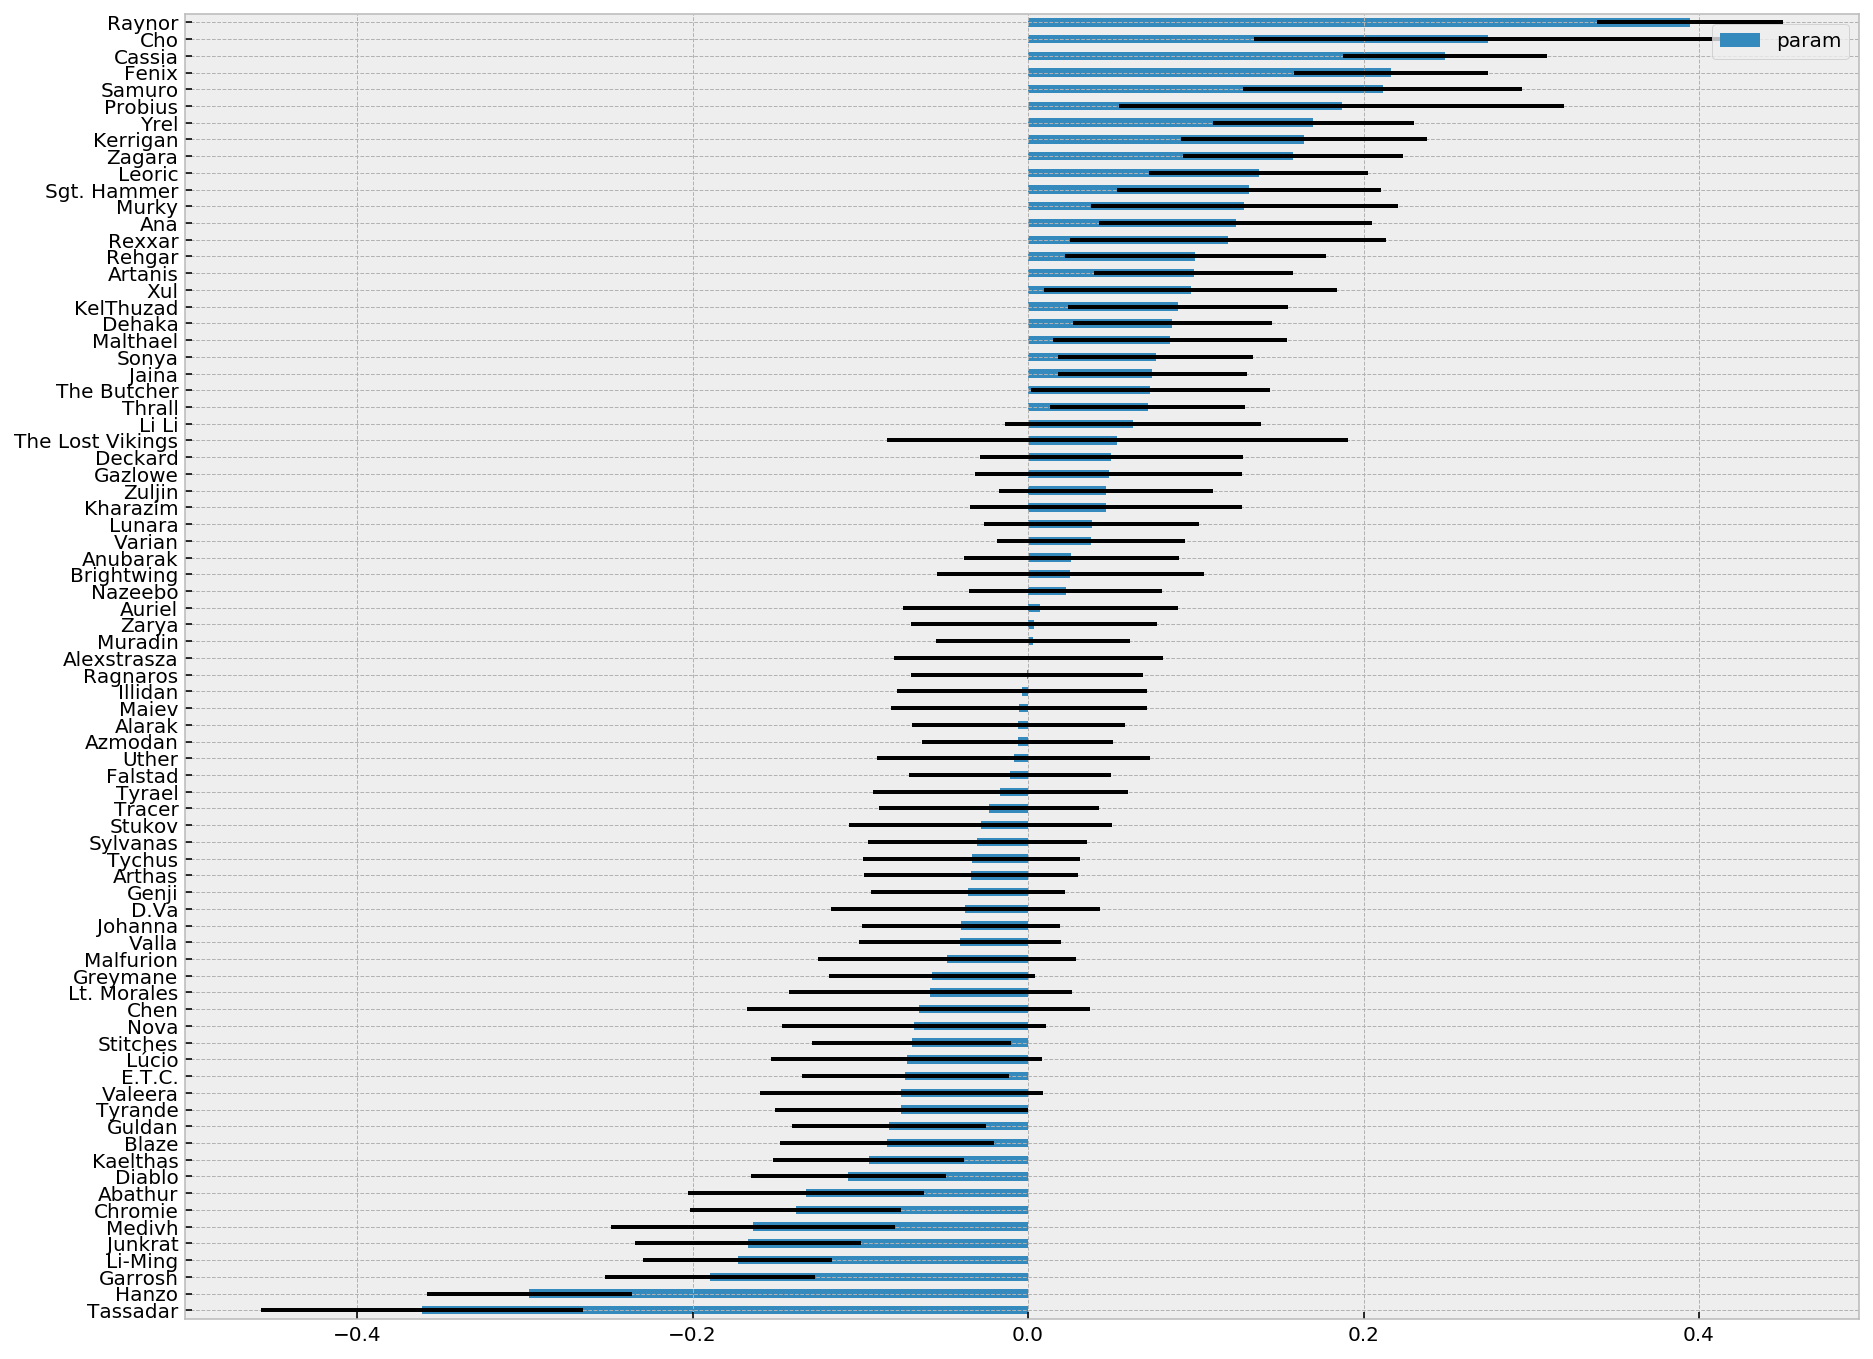

In [37]:
f, ax = plt.subplots(1,1,figsize=(15,12))

yerr = results.bse.filter(like='allied_char')

r = pd.DataFrame({'param': x, 'error': 1.96*yerr})
r.index = [_.lstrip('allied_char_') for _ in r.index]

r.sort_values('param').plot.barh(y='param', ax=ax, color='#348ABD', xerr='error', lw=0.1)
plt.savefig("coefs.png", bbox_inches='tight')

In [22]:
x.sort_values().index[int(len(x)/2)]

'allied_char_Zeratul'